In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2025-05-14 21:51:48.613008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 21:51:48.626122: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 21:51:48.672038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747238808.742198   62933 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747238808.761930   62933 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747238808.821253   62933 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
df = df[['Close']]
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288578
2015-01-05,23.604336
2015-01-06,23.606554
2015-01-07,23.937569
2015-01-08,24.857309


In [3]:
# Normalize closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


In [4]:
# Create sequences for LSTM
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

In [5]:
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [6]:
# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

2025-05-14 23:08:55.430017: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/linuxbrew/.linuxbrew/Cellar/python@3.10/3.10.17/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - loss: 0.0321 - val_loss: 0.0016
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 4.3055e-04 - val_loss: 0.0017
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 4.2088e-04 - val_loss: 0.0017
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 3.9262e-04 - val_loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 4.1370e-04 - val_loss: 0.0013
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.3258e-04 - val_loss: 0.0013
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 3.5919e-04 - val_loss: 0.0012
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 4.0339e-04 - val_loss: 0.0013
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 3.9098e-04 - val_loss: 0.0011
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 3.2027e-04 - val_loss: 0.0012
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 3.2514e-04 - val_loss: 0.0011
Epoch 12/2

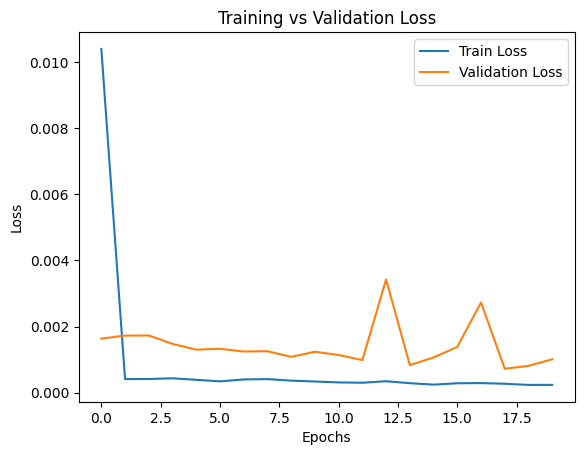

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [12]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step


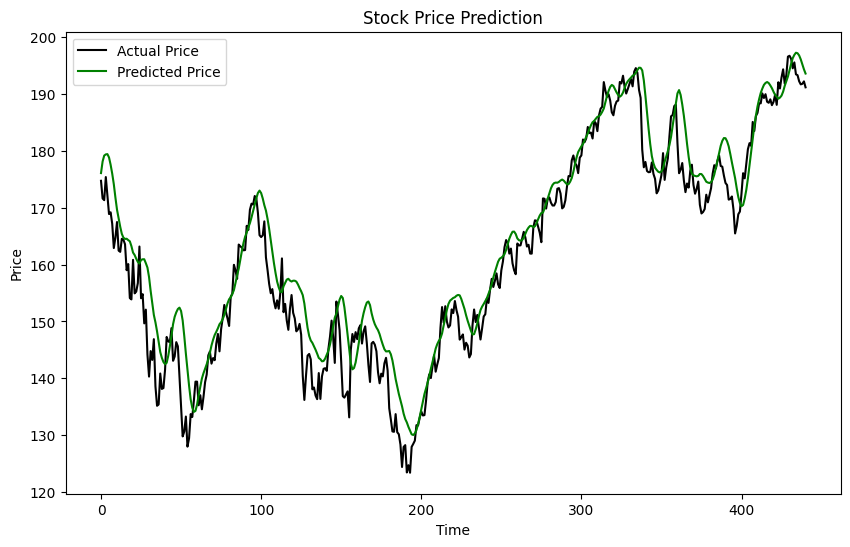

In [13]:
plt.figure(figsize=(10,6))
plt.plot(actual_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='green', label='Predicted Price')
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
